In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/kaggle/input/email-spam-detection-dataset-classification/spam.csv',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [6]:
#EDA
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)

In [8]:
data.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)
data.head()

,message_type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
encoder =LabelEncoder()
data['message_type']=encoder.fit_transform(data['message_type'])
data.head()

,message_type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.duplicated().sum()

403

In [11]:
data= data.drop_duplicates()

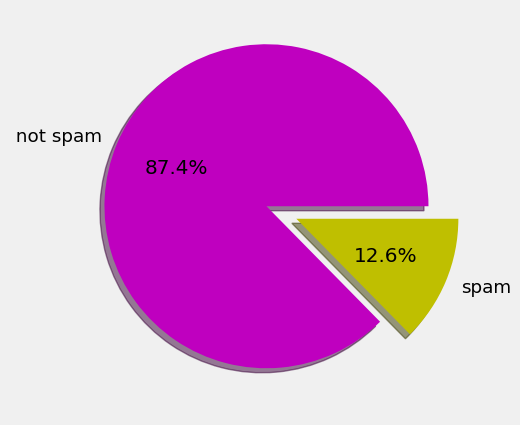

In [12]:
plt.style.use('fivethirtyeight')
colors = ['m','y']
explode = [0.1,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie(data['message_type'].value_counts(),labels=[' not spam','spam'],explode=explode,shadow=True,colors=colors, autopct='%1.1f%%')
plt.show()

In [13]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
data['num_characters']=data['message'].apply(len)
data.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
from nltk.tokenize import word_tokenize
data['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy.., Availab...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [16]:
data['num_words']=data['message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.sample(7)

,message_type,message,num_characters,num_words
4269,0,Great. Hope you are using your connections fro...,122,25
4693,0,Pls give her the food preferably pap very slow...,147,34
308,1,TheMob> Check out our newest selection of cont...,138,30
3149,0,Yo! Howz u? girls never rang after india. L,43,12
343,0,Am not interested to do like that.,34,8
4688,0,"Didn't try, g and I decided not to head out",43,12
1505,0,Total video converter free download type this ...,64,12


In [17]:
data['num_sentences']=data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.sample(7)

,message_type,message,num_characters,num_words,num_sentences
5180,0,Babe! I fucking love you too !! You know? Fuck...,157,43,8
3855,0,I'm ok. Will do my part tomorrow,32,8,1
5415,0,You should get more chicken broth if you want ...,90,19,1
4707,0,"Did you say bold, then torch later. Or one tor...",59,15,2
1744,1,Someone has conacted our dating service and en...,155,27,2
2147,0,Ok. Can be later showing around 8-8:30 if you ...,154,36,2
886,0,I like to talk pa but am not able to. I dont k...,52,16,2


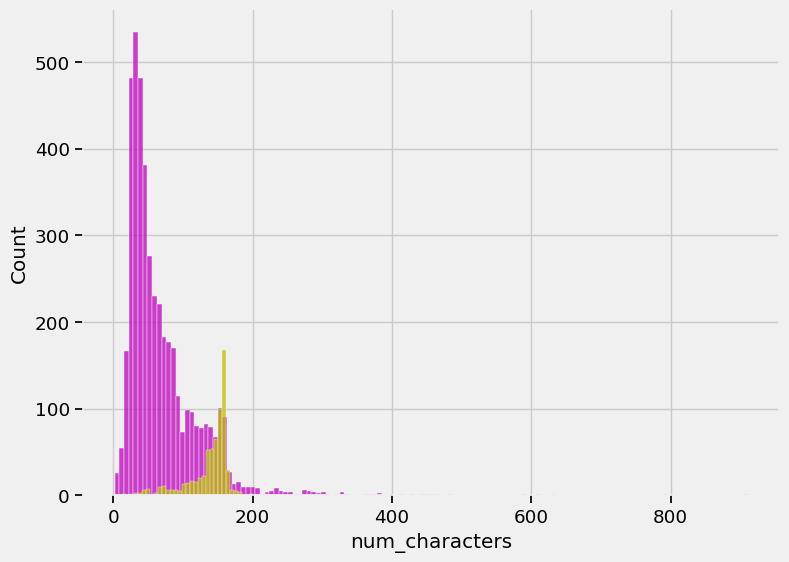

In [18]:
#for characters
plt.figure(figsize=(8,6))
sns.histplot(data[data['message_type']==0]['num_characters'],color='m')
sns.histplot(data[data['message_type']==1]['num_characters'],color = 'y')
plt.show()

In [19]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)
    y=[] 
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    
    for i in message:
        y.append(ps.stem(i))
    
    #return y as list
    return " ".join(y)

In [20]:
# Removing stop words and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [21]:
#now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
# stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [23]:
data['transformed_msg']=data['message'].apply(text_transform)
data.head()

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point crazy.. avail bugi n great wor...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [24]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='magenta')

In [25]:
spam_wc=wc.generate(data[data['message_type']==1]['transformed_msg'].str.cat(sep=""))

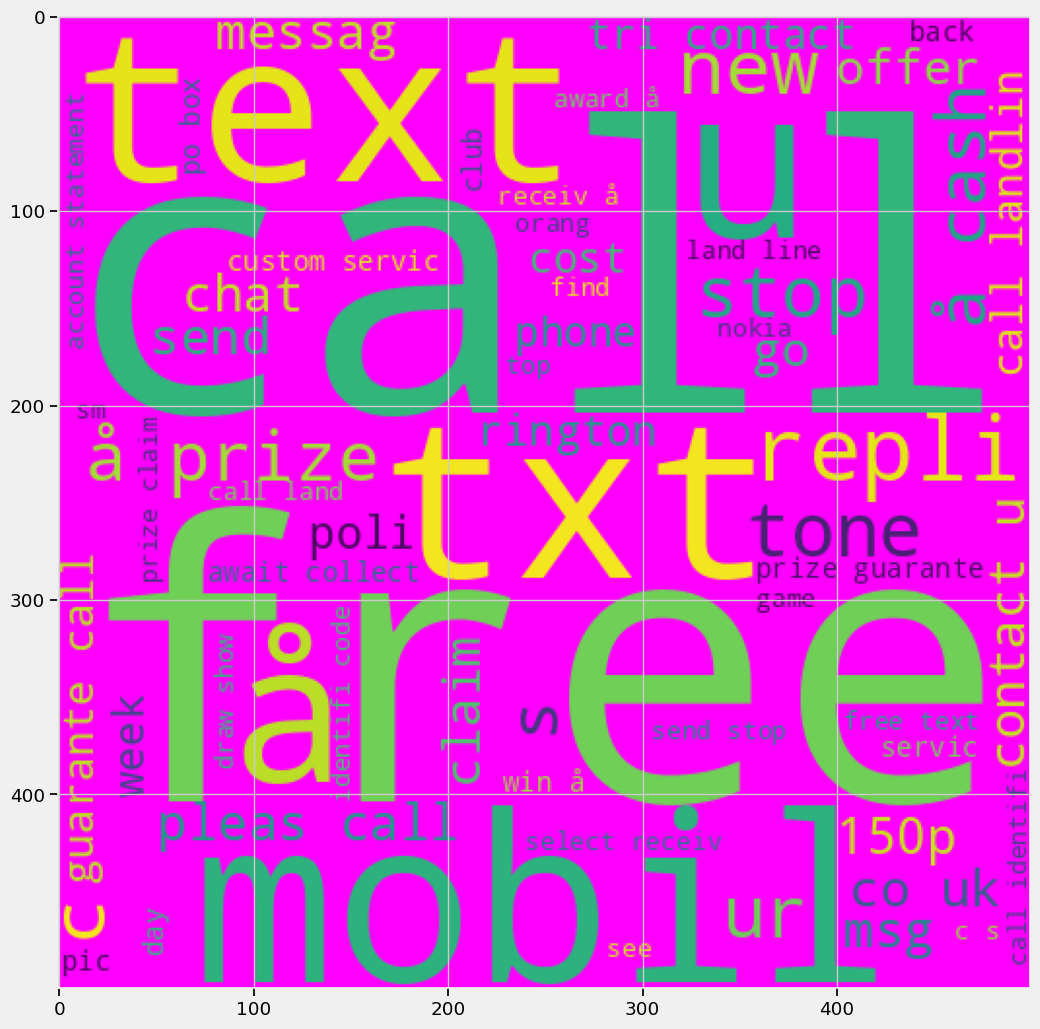

In [26]:
plt.figure(figsize=(14,12))
plt.imshow(spam_wc)
plt.show()

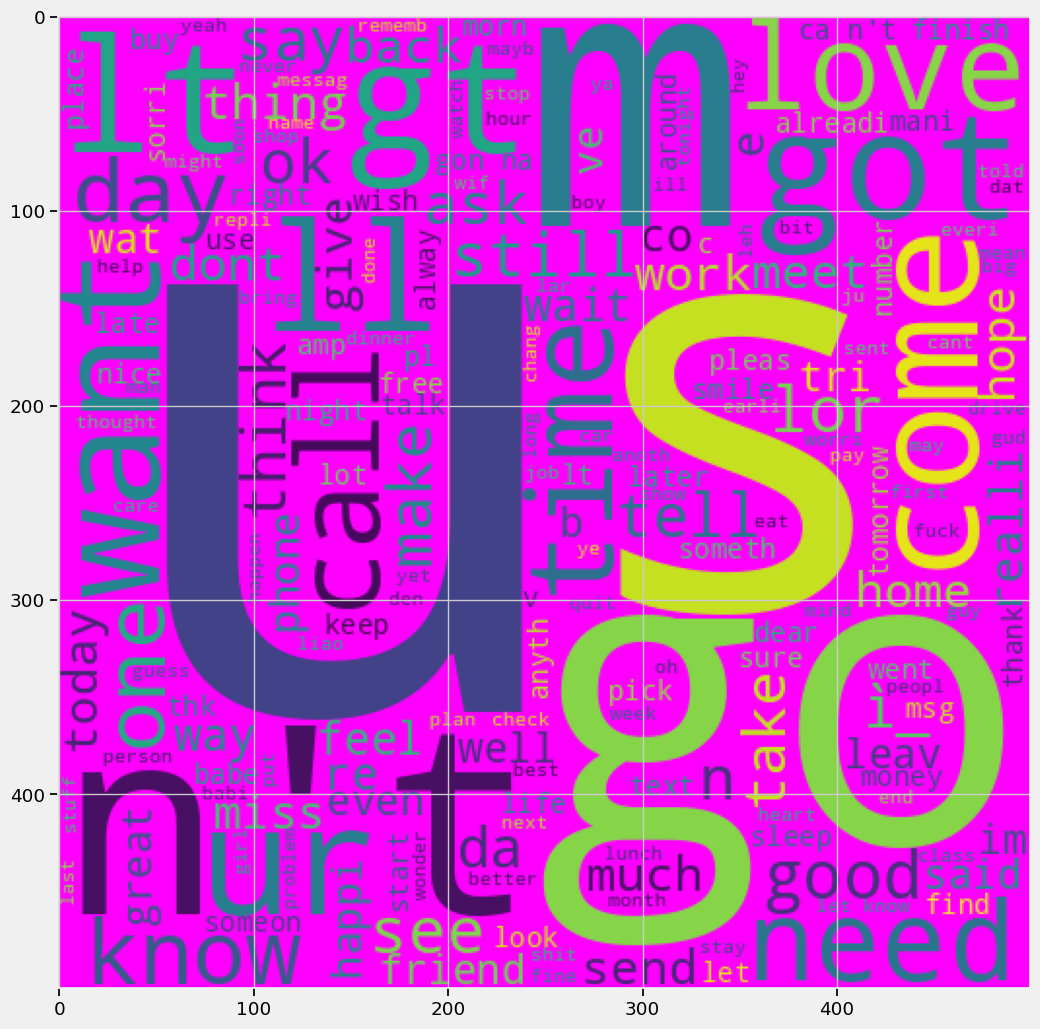

In [27]:
ham_wc=wc.generate(data[data['message_type']==0]['transformed_msg'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)
plt.show()

In [28]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000) 

In [29]:
X=tfidf.fit_transform(data['transformed_msg']).toarray()
y=data['message_type'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
#Training model.
model = BernoulliNB() 
model.fit(X_train, y_train)


BernoulliNB()

In [31]:
#Predict and show the Accuracy & Confutin matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confution matrix for model " f'{model} : \n',cm)
ac = accuracy_score(y_test, y_pred)
print("Accuracy score for model " f'{model} : ',ac)

Confution matrix for model BernoulliNB() : 
 [[896   0]
 [ 14 124]]
Accuracy score for model BernoulliNB() :  0.9864603481624759


In [32]:
y_pred = model.predict(X_test)

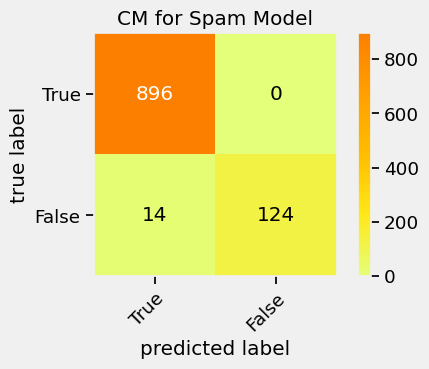

In [33]:
from mlxtend.plotting import plot_confusion_matrix
cm_rnf = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='Wistia',
                               class_names = [True , False ],
                               figsize=(5, 3))
plt.title("CM for Spam Model")
plt.show()